# Imports and Setup

In [17]:
import sys
sys.path.append('../')

# Reset variables and functions from other scripts
import importlib
import utils.utils as utils
importlib.reload(utils)
import utils.config as config
importlib.reload(config)

from utils.utils import (
    evaluate_pipeline,
    summarize_model_results
)

from utils.config import primary_metric

import joblib

X = joblib.load('saved/X.pkl')
X_train = joblib.load('saved/X_train.pkl')
y_train = joblib.load('saved/y_train.pkl')
X_test = joblib.load('saved/X_test.pkl')
y_test = joblib.load('saved/y_test.pkl')

data = [X, X_train, y_train, X_test, y_test]

# Training

### DummyClassifier


dummy_classifier - TRAIN METRICS:

Accuracy: 50.23%
F1 Score: 43.26%
Precision: 43.32%
True Positive Rate (Recall): 43.20%
True Negative Rate (Specificity): 55.74%
False Positive Rate: 44.26%
False Negative Rate: 56.80%


dummy_classifier - TEST METRICS:

Accuracy: 51.75%
F1 Score: 45.48%
Precision: 45.17%
True Positive Rate (Recall): 45.80%
True Negative Rate (Specificity): 56.42%
False Positive Rate: 43.58%
False Negative Rate: 54.20%



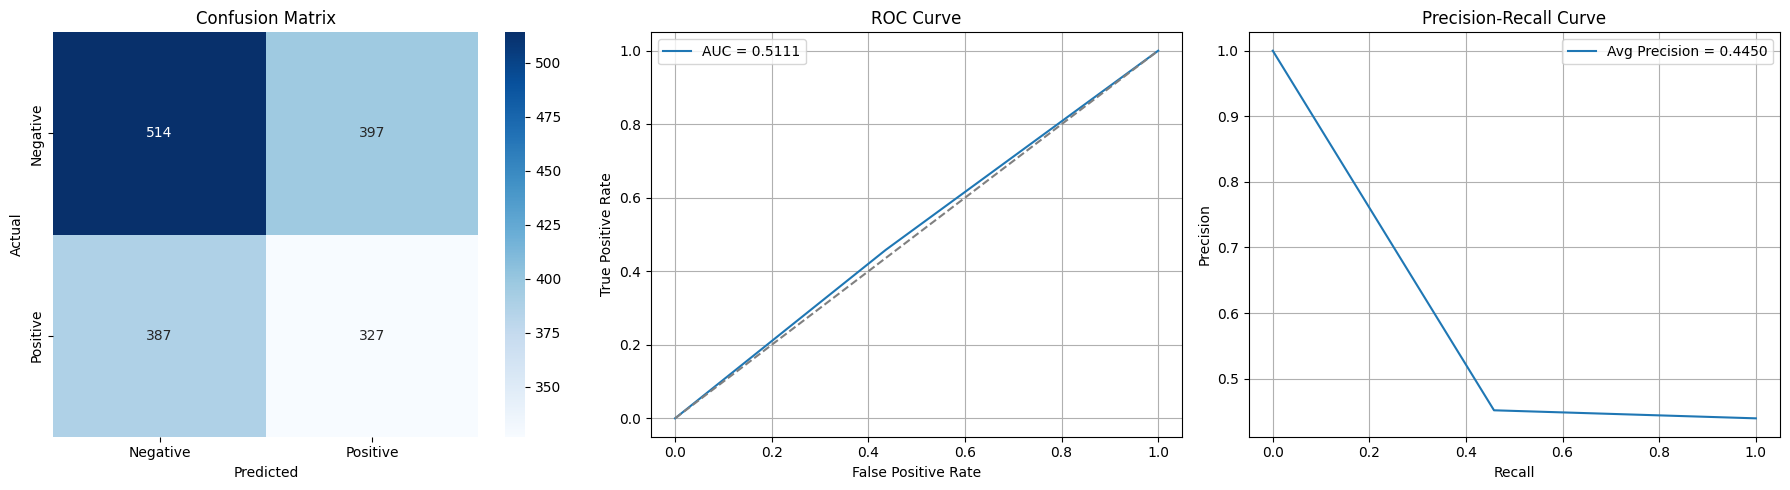

In [18]:
dummy_pipeline, dummy_data = evaluate_pipeline('dummy_classifier', data)

### Logistic Regression


Best hyperparameters for logistic_regression (GridSearchCV):
{'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

logistic_regression - TRAIN METRICS:

Accuracy: 72.90%
F1 Score: 68.09%
Precision: 70.51%
True Positive Rate (Recall): 65.84%
True Negative Rate (Specificity): 78.43%
False Positive Rate: 21.57%
False Negative Rate: 34.16%


logistic_regression - TEST METRICS:

Accuracy: 73.54%
F1 Score: 69.24%
Precision: 70.76%
True Positive Rate (Recall): 67.79%
True Negative Rate (Specificity): 78.05%
False Positive Rate: 21.95%
False Negative Rate: 32.21%



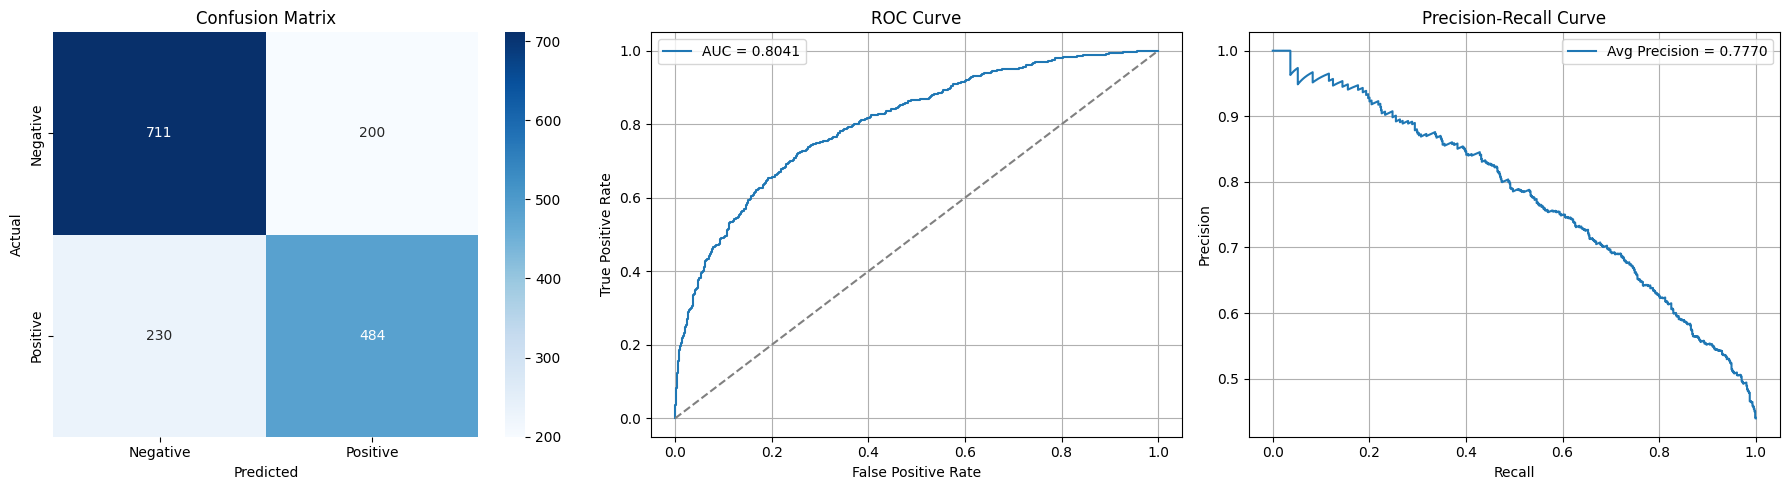

In [19]:
logistic_pipeline, logistic_data = evaluate_pipeline('logistic_regression', data)

### Random Forest


Best hyperparameters for random_forest (RandomizedSearchCV):
{'model__n_estimators': 150, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_samples': 0.2, 'model__max_leaf_nodes': 20, 'model__max_features': 'sqrt', 'model__max_depth': 8, 'model__criterion': 'gini', 'model__class_weight': 'balanced'}

random_forest - TRAIN METRICS:

Accuracy: 80.30%
F1 Score: 78.04%
Precision: 76.46%
True Positive Rate (Recall): 79.68%
True Negative Rate (Specificity): 80.79%
False Positive Rate: 19.21%
False Negative Rate: 20.32%


random_forest - TEST METRICS:

Accuracy: 75.20%
F1 Score: 72.38%
Precision: 70.87%
True Positive Rate (Recall): 73.95%
True Negative Rate (Specificity): 76.18%
False Positive Rate: 23.82%
False Negative Rate: 26.05%



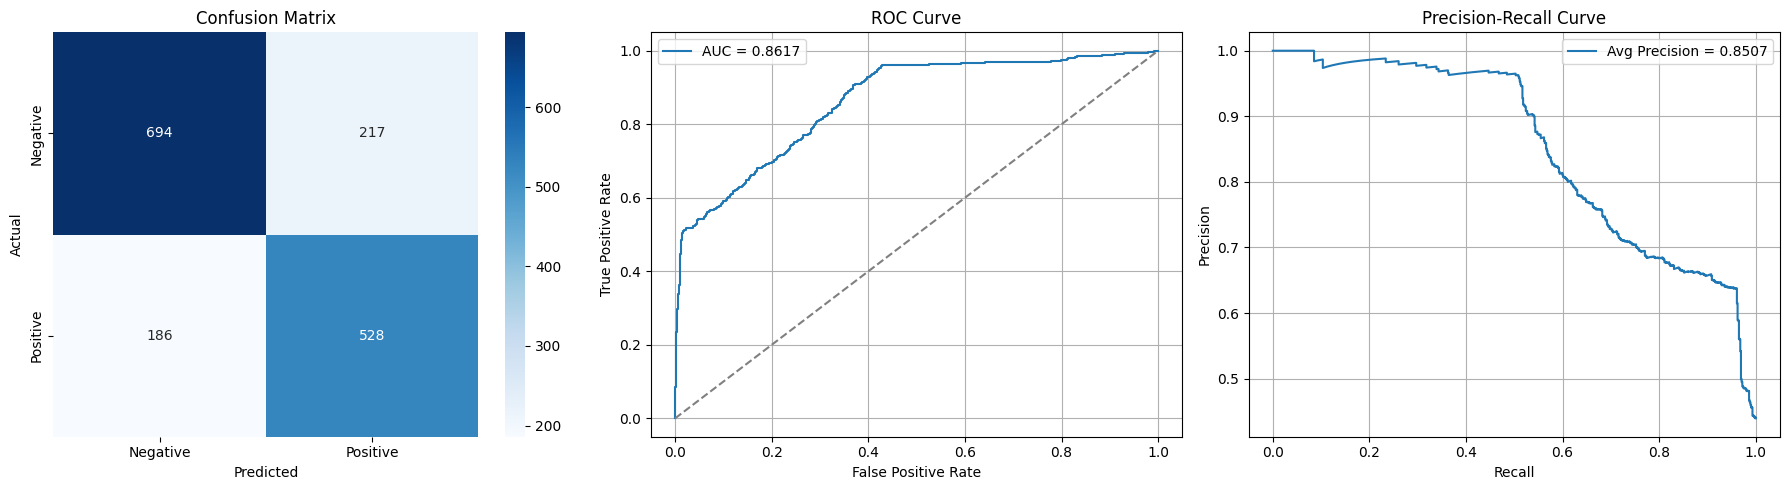

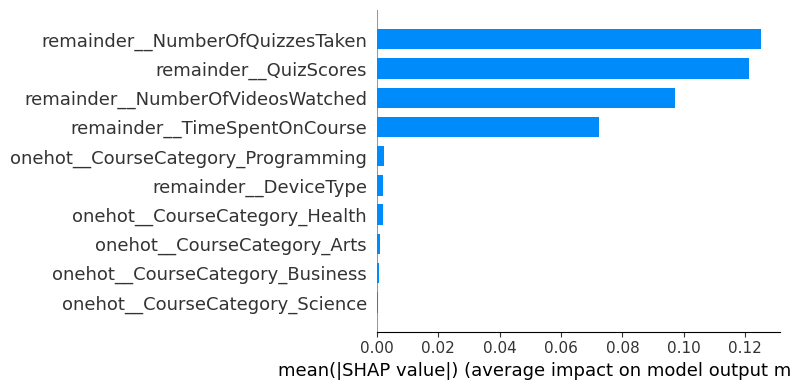

In [20]:
forest_pipeline, forest_data = evaluate_pipeline('random_forest', data)

### LightGBM


Best hyperparameters for lightgbm (RandomizedSearchCV):
{'model__subsample': 0.8, 'model__reg_lambda': 3, 'model__reg_alpha': 0.1, 'model__num_leaves': 30, 'model__n_estimators': 200, 'model__min_split_gain': 1, 'model__min_child_samples': 20, 'model__max_depth': 6, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.6, 'model__class_weight': 'balanced'}

lightgbm - TRAIN METRICS:

Accuracy: 80.10%
F1 Score: 78.83%
Precision: 73.98%
True Positive Rate (Recall): 84.37%
True Negative Rate (Specificity): 76.76%
False Positive Rate: 23.24%
False Negative Rate: 15.63%


lightgbm - TEST METRICS:

Accuracy: 74.15%
F1 Score: 72.66%
Precision: 67.88%
True Positive Rate (Recall): 78.15%
True Negative Rate (Specificity): 71.02%
False Positive Rate: 28.98%
False Negative Rate: 21.85%



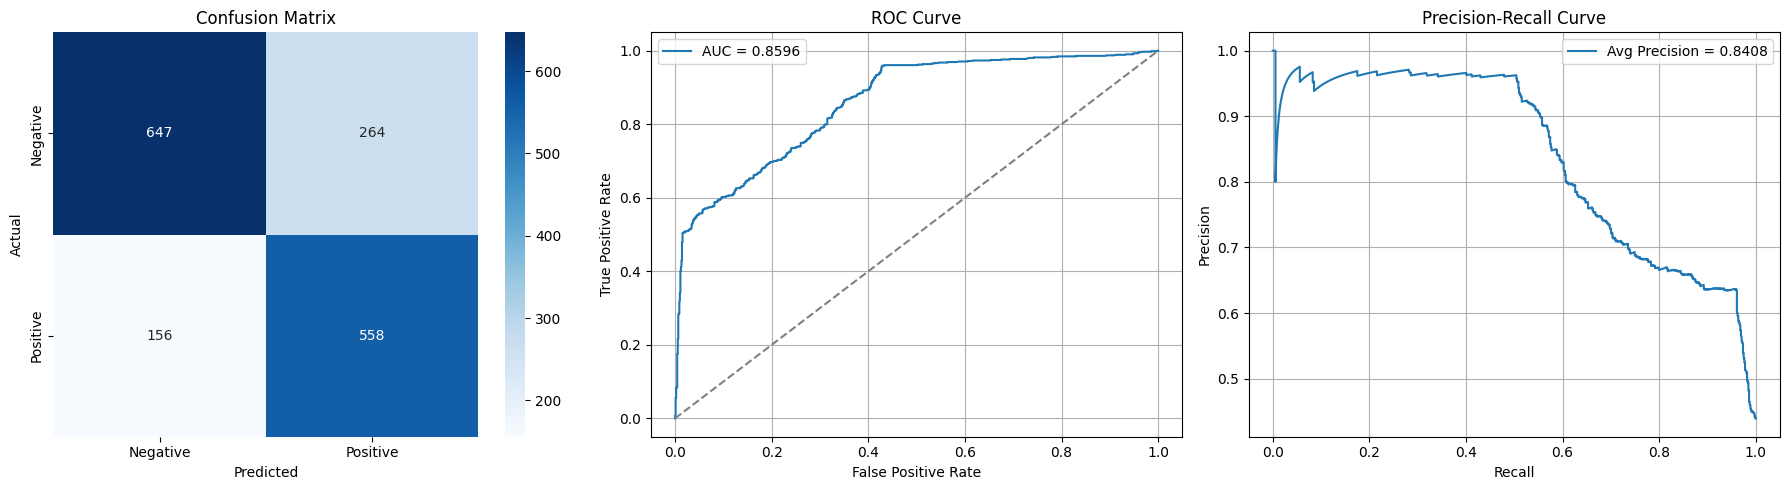

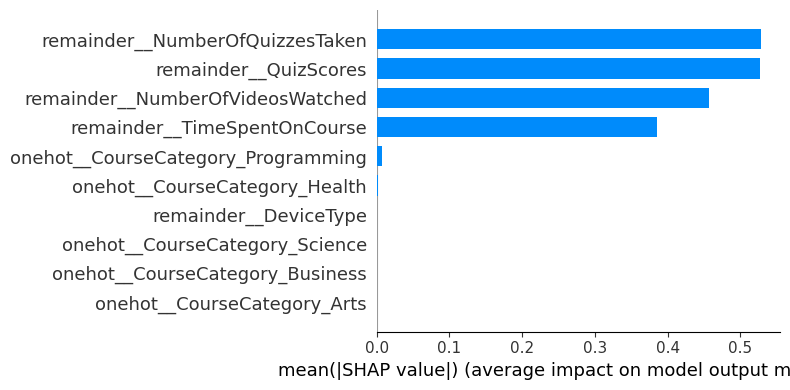

In [21]:
light_pipeline, light_data = evaluate_pipeline('lightgbm', data)

# Analysis

In [24]:
# Precomputed metric results from evaluation
model_data = {
    'dummy_classifier': dummy_data,
    'logistic_regression': logistic_data,
    'random_forest': forest_data,
    'lightgbm': light_data
}

fitted_pipelines = {
    'dummy_classifier': dummy_pipeline,
    'logistic_regression': logistic_pipeline,
    'random_forest': forest_pipeline,
    'lightgbm': light_pipeline
}

metrics_to_display = {
    'F1': '{:.2%}',
    'Accuracy': '{:.2%}',
    'Precision': '{:.2%}'
}

best_model, best_pipeline = summarize_model_results(
    model_data,
    primary_metric,
    metrics_to_display,
    fitted_pipelines
)

**Worst model by F1:** dummy_classifier with a score of 45.48%

**Best model by F1:** lightgbm with a score of 72.66%

,F1,Accuracy,Precision
lightgbm,72.66%,74.15%,67.88%
random_forest,72.38%,75.20%,70.87%
logistic_regression,69.24%,73.54%,70.76%
dummy_classifier,45.48%,51.75%,45.17%
